# AI4Demand Project developed by S&C Amper IoT S.L

## This project was funded by I-NERGY project


##  Brief Overview <a name="1"></a>
______
AI4Demand is a service developed for predicting the short-term (hourly and daily) energy demand and consumption at the building level using novel Artificial Intelligence-based approaches where the cause-and-effect relations between energy data and external influencing factors are considered and analyzed. 

The core methodology of the module is based on the multi-level architecture combining statistical analysis, signal processing and machine learning techniques. 

Prediction model has been trained on two different datasets collected from the city of Helsinki, containing the energy consumption data (taken from https://helsinki-openapi.nuuka.cloud/swagger/index.html#/EnergyData) and meteorological information (obtained from https://en.ilmatieteenlaitos.fi/download-observations).

Evaluation of the module is done using MSE and POCID metrics.

##  Diagram of the Prediction Module

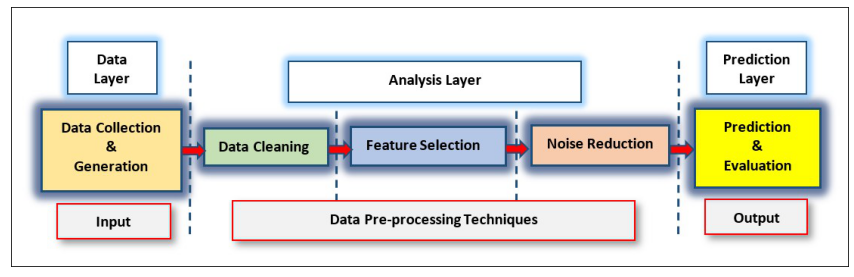

In [2]:
import matplotlib.pyplot as plt
ca_map = plt.imread('diagram.jpg')
_ = plt.figure(figsize = (15,15))
_ = plt.imshow(ca_map)
_ = plt.xticks([])
_ = plt.yticks([])

##  Methods Used <a name="1"></a>
______
 •	Data Collection (NUUKA API and manual collection)
 
 •	Data Cleaning (Elimination of missing and NA values, standardization and normalization of datasets)
 
 •	Feature Selection (Random Forests)
 
 •	Noise Reduction (Discrete Wavelet Transform)
 
 •	Deep Learning (LSTM - Autoencoders)
  
 •	Evaluation (MSE, POCID)

##  Libraries Used <a name="1"></a>
______
 •	Pandas
 
 •	Numpy
 
 •	Scikit Learn
 
 •	Pwt
 
 •	Math
 
 •	Keras
 
 •	Tensorflow

### In this Jupyter notebook we provide an example of how to use the prediction module
#### *you can change and adapt all the parameters in the code and data inputs based on the needs of your project and related datasets

# 1. Uploading the Necessary Datasets

In [3]:
# Importing all the required libraries and modules
import pandas as pd
import numpy as np

In [4]:
# Import the necessary energy consumption data previously cleaned, explored, feature-engineered and show the data table
dataset_df=pd.read_csv('Malmi_office_building_hourly.csv')
dataset_df.index = dataset_df.Date
dataset_df = dataset_df.drop(['Date'],axis=1)
dataset_df = dataset_df.astype('float64')

# 2. Data Visualization and Exploration

In [5]:
# First part of the dataframe
dataset_df.head()

,ElCons,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
Date,,,,,,,,,,,
01/01/2020 00:00,17.25,70.0,0.0,1011.5,90.0,-1.9,-3.3,18632.0,226.0,2.6,2.0
01/01/2020 01:00,17.21,70.0,0.0,1011.4,92.0,-2.1,-3.1,22284.0,237.0,2.9,2.1
01/01/2020 02:00,17.00,80.0,0.0,1010.9,87.0,-0.5,-2.5,50000.0,286.0,4.0,2.6
01/01/2020 03:00,17.22,70.0,0.0,1010.7,83.0,0.2,-2.4,48969.0,274.0,4.2,2.9
01/01/2020 04:00,17.09,70.0,3.0,1009.9,84.0,0.1,-2.2,49724.0,244.0,4.2,3.0


In [6]:
# Last part of the dataframe
dataset_df.tail()

,ElCons,Heat,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
Date,,,,,,,,,,,
17/03/2020 19:00,29.86,50.0,8.0,1012.5,88.0,4.6,2.7,23136.0,220.0,8.4,5.2
17/03/2020 20:00,27.70,50.0,8.0,1012.2,87.0,4.5,2.5,29497.0,214.0,7.6,5.0
17/03/2020 21:00,15.73,60.0,8.0,1012.2,87.0,4.7,2.6,33699.0,210.0,7.6,4.9
17/03/2020 22:00,15.53,50.0,8.0,1012.1,87.0,4.8,2.8,29190.0,220.0,6.0,4.0
17/03/2020 23:00,14.72,50.0,8.0,1011.8,87.0,4.9,2.9,31815.0,220.0,8.0,4.3


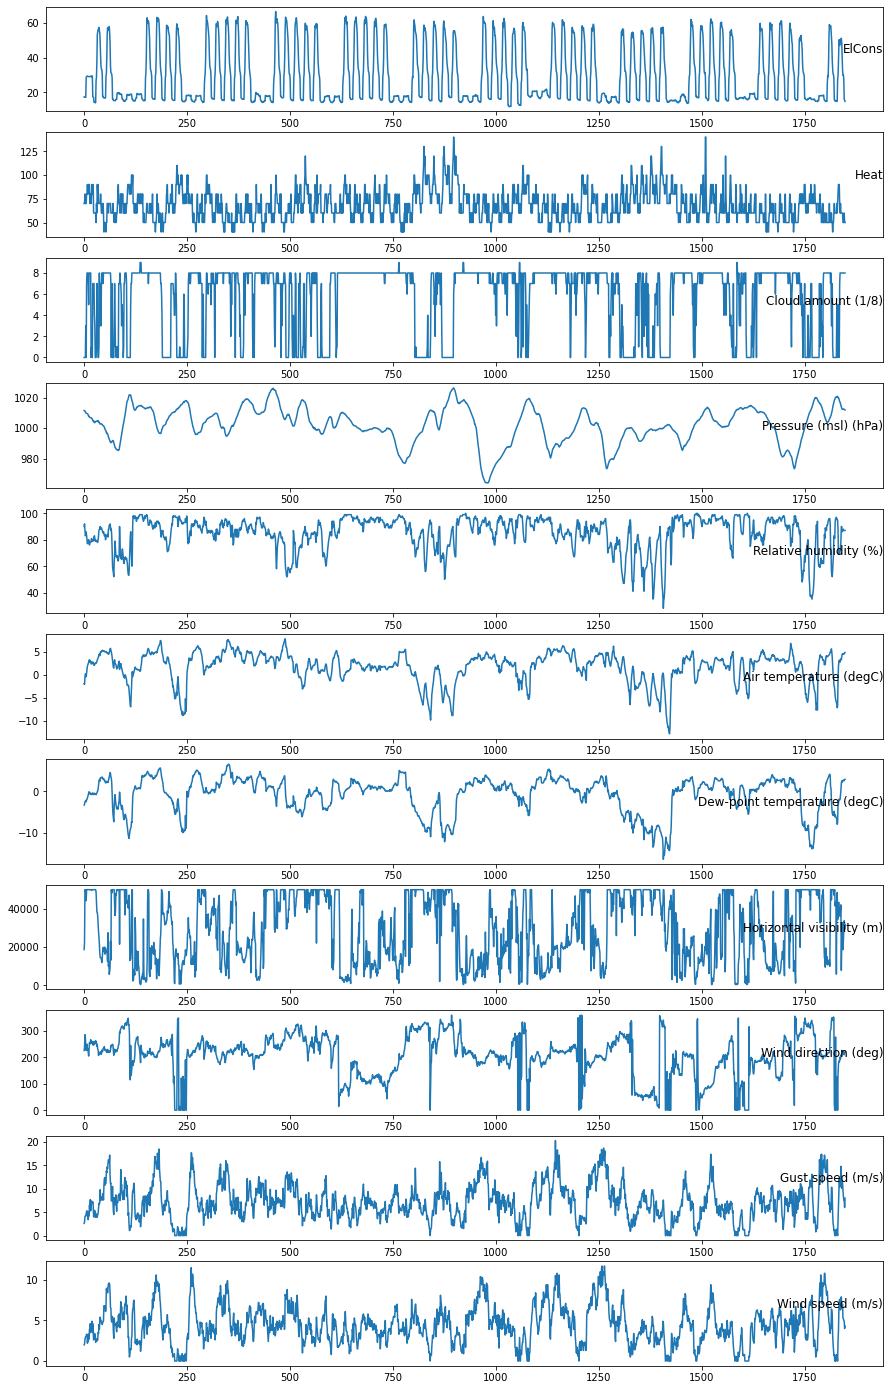

In [7]:
# Plot each column of variable
values = dataset_df.values

groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #number of variables
i = 1

plt.figure(figsize = (15, 25))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset_df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

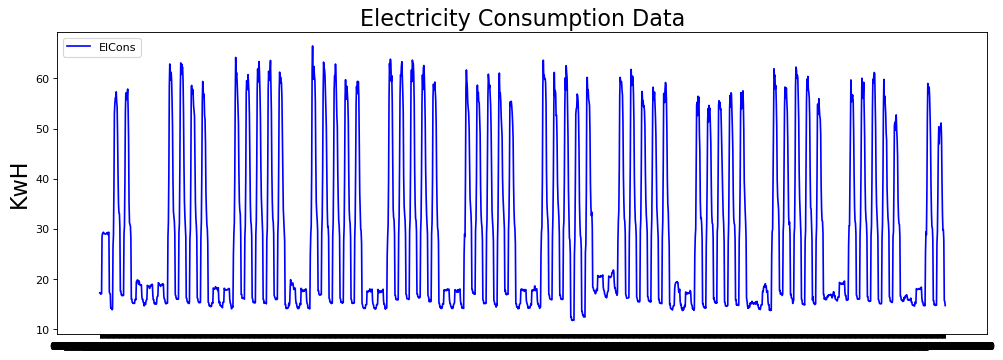

In [8]:
# Plot the target for the prediction module
d = dataset_df['ElCons']
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 
line1, = plt.plot(d,color = 'b',label='ElCons')
plt.title('Electricity Consumption Data', fontsize=20)
plt.ylabel('KwH', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

In [9]:
### Dealing with Missing Values

# Getting the number of missing values in each column
num_missing = dataset_df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset_df.shape[0]
# Concatenating the number and perecentage of missing values into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage


In [10]:
# Drop NA values and show if there are any
dataset_df.dropna(axis=0, inplace=True)
dataset_df.isna().values.sum()

0

In [11]:
# Statistical information about the dataset
dataset_df.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
ElCons,29.476228,16.449097,11.74,19.105,66.49
Heat,68.517316,15.735659,40.00,70.000,140.00
Cloud amount (1/8),5.769481,3.211360,0.00,8.000,9.00
Pressure (msl) (hPa),1002.096266,11.808863,964.00,1002.600,1026.30
Relative humidity (%),84.895022,12.560490,28.00,88.000,100.00
Air temperature (degC),1.677489,3.289017,-12.90,2.400,7.90
Dew-point temperature (degC),-0.743669,4.190069,-16.30,0.500,6.50
Horizontal visibility (m),29447.894481,17203.921827,222.00,29558.500,50000.00
Wind direction (deg),204.626082,79.803218,0.00,214.000,360.00
Gust speed (m/s),7.145671,3.779383,0.00,6.900,20.30


# 3. Feature Selection with Random Forest Algorithm

In [12]:
# Import basic modules for performing the feature selecition
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

pd.set_option('display.max_columns', 100)

In [13]:
# Defining basic functions for Random Forest-based feature selection
X_train = dataset_df.drop(['ElCons'], axis=1)
y_train = dataset_df['ElCons']

feat_labels = X_train.columns

rf = RandomForestRegressor(n_estimators=250, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_


indices = np.argsort(rf.feature_importances_)[::-1]

print('Top features:')
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

Top features:
 1) Heat                           0.196319
 2) Air temperature (degC)         0.178499
 3) Pressure (msl) (hPa)           0.138565
 4) Wind direction (deg)           0.114557
 5) Horizontal visibility (m)      0.092930
 6) Dew-point temperature (degC)   0.070603
 7) Relative humidity (%)          0.064916
 8) Wind speed (m/s)               0.063264
 9) Gust speed (m/s)               0.061756
10) Cloud amount (1/8)             0.018592


In [14]:
# Selecting important features from the whole data set
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 10
Number of features after selection: 5


In [15]:
# Eliminating unnecesary features and keeping only the selected ones
dataset_df=dataset_df.drop(columns=['Dew-point temperature (degC)', 'Relative humidity (%)','Wind speed (m/s)','Gust speed (m/s)','Cloud amount (1/8)'])
dataset_df.head()

,ElCons,Heat,Pressure (msl) (hPa),Air temperature (degC),Horizontal visibility (m),Wind direction (deg)
Date,,,,,,
01/01/2020 00:00,17.25,70.0,1011.5,-1.9,18632.0,226.0
01/01/2020 01:00,17.21,70.0,1011.4,-2.1,22284.0,237.0
01/01/2020 02:00,17.00,80.0,1010.9,-0.5,50000.0,286.0
01/01/2020 03:00,17.22,70.0,1010.7,0.2,48969.0,274.0
01/01/2020 04:00,17.09,70.0,1009.9,0.1,49724.0,244.0


# 4. Data Cleaning with Discrete Wavelet Transform

In [16]:
# Importing the necessary libraries for data denoising and defining the main functions
import statsmodels.api as sm
import pywt
import copy
import warnings


def WT(index_list, wavefunc='db4', lv=5, m=1, n=1, plot=False):
    
    '''
    WT: Wavelet Transformation Function
    index_list: Input Sequence;
   
    lv: Decomposing Level；
 
    wavefunc: Function of Wavelet, 'db4' default；
    
    m, n: Level of Threshold Processing
   
    '''
   
    # Decomposing 
    coeff = pywt.wavedec(index_list,wavefunc,mode='sym',level=lv)   #  Decomposing by levels，cD is the details coefficient
    sgn = lambda x: 1 if x > 0 else -1 if x < 0 else 0 # sgn function 

    # Denoising
    # Soft Threshold Processing Method
    for i in range(m,n+1):   #  Select m~n Levels of the wavelet coefficients，and no need to dispose the cA coefficients(approximation coefficients)
        cD = coeff[i]
        Tr = np.sqrt(2*np.log2(len(cD)))  # Compute Threshold
        for j in range(len(cD)):
            if cD[j] >= Tr:
                coeff[i][j] = sgn(cD[j]) * (np.abs(cD[j]) -  Tr)  # Shrink to zero
            else:
                coeff[i][j] = 0   # Set to zero if smaller than threshold

    # Reconstructing
    coeffs = {}
    for i in range(len(coeff)):
        coeffs[i] = copy.deepcopy(coeff)
        for j in range(len(coeff)):
            if j != i:
                coeffs[i][j] = np.zeros_like(coeff[j])
    
    for i in range(len(coeff)):
        coeff[i] = pywt.waverec(coeffs[i], wavefunc)
        if len(coeff[i]) > len(index_list):
            coeff[i] = coeff[i][:-1]
        
    if plot:     
        denoised_index = np.sum(coeff, axis=0)   
        data = pd.DataFrame({'Original': index_list, 'Denoised': denoised_index})
        data.plot(figsize=(10,10),subplots=(2,1))
        data.plot(figsize=(10,5))
   
    return coeff

In [17]:
dataset_wt=dataset_df
dataset_wt.head()

,ElCons,Heat,Pressure (msl) (hPa),Air temperature (degC),Horizontal visibility (m),Wind direction (deg)
Date,,,,,,
01/01/2020 00:00,17.25,70.0,1011.5,-1.9,18632.0,226.0
01/01/2020 01:00,17.21,70.0,1011.4,-2.1,22284.0,237.0
01/01/2020 02:00,17.00,80.0,1010.9,-0.5,50000.0,286.0
01/01/2020 03:00,17.22,70.0,1010.7,0.2,48969.0,274.0
01/01/2020 04:00,17.09,70.0,1009.9,0.1,49724.0,244.0


In [18]:
# Selecting variables for the noise reduction
var1m=dataset_wt['Heat']                            
var2m=dataset_wt['Air temperature (degC)']          
var3m=dataset_wt['Pressure (msl) (hPa)']            
var4m=dataset_wt['Wind direction (deg)']            
var5m=dataset_wt['Horizontal visibility (m)']       

In [19]:
# Denoising coefficients
coeff1m = WT(var1m, plot=False)
coeff2m = WT(var2m, plot=False)
coeff3m = WT(var3m, plot=False)
coeff4m = WT(var4m, plot=False)
coeff5m = WT(var5m, plot=False)

In [20]:
# To visualise the data denoising procedure uncomment this part

#coeff1m = WT(var1m, plot=True)
#coeff2m = WT(var2m, plot=True)
#coeff3m = WT(var3m, plot=True)
#coeff4m = WT(var4m, plot=True)
#coeff5m = WT(var5m, plot=True)

In [21]:
# Denoising each index
denoised_index1m = np.sum(coeff1m, axis=0)
denoised_index2m = np.sum(coeff2m, axis=0)
denoised_index3m = np.sum(coeff3m, axis=0)
denoised_index4m = np.sum(coeff4m, axis=0)
denoised_index5m = np.sum(coeff5m, axis=0)

In [22]:
# To visualise the denoised indexes uncomment this part

#denoised_index1m
#denoised_index2m
#denoised_index3m
#denoised_index4m
#denoised_index5m

In [23]:
# To visualise the coefficients uncomment this part

#coeff1m
#coeff2m
#coeff3m
#coeff4m
#coeff5m

In [24]:
# Create wavelet object and define parameters
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(var1m), w.dec_len)
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

maximum level is 8


In [25]:
# Decompose into wavelet components, to the level selected:
coeffd1m = pywt.wavedec(var1m, 'db4', level=maxlev)
coeffd2m = pywt.wavedec(var2m, 'db4', level=maxlev)
coeffd3m = pywt.wavedec(var3m, 'db4', level=maxlev)
coeffd4m = pywt.wavedec(var4m, 'db4', level=maxlev)
coeffd5m = pywt.wavedec(var5m, 'db4', level=maxlev)

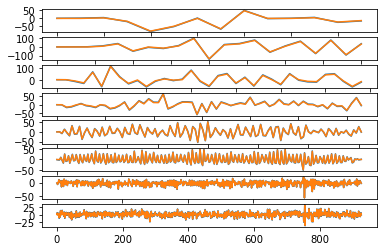

In [26]:
# Plotting the de-noising results
plt.figure()
for i in range(1, len(coeffd1m)):
    plt.subplot(maxlev, 1, i)
    plt.plot(coeffd1m[i])
    coeffd1m[i] = pywt.threshold(coeffd1m[i], threshold*max(coeffd1m[i]))
    plt.plot(coeffd1m[i])

In [27]:
# Creating column with denoised variables
denoised_index1m=pd.DataFrame(denoised_index1m)
denoised_index1m.columns =['Heat']
denoised_index2m=pd.DataFrame(denoised_index2m)
denoised_index2m.columns =['Air temperature (degC)']
denoised_index3m=pd.DataFrame(denoised_index3m)
denoised_index3m.columns =['Pressure (msl) (hPa)']
denoised_index4m=pd.DataFrame(denoised_index4m)
denoised_index4m.columns =['Wind direction (deg)']
denoised_index5m=pd.DataFrame(denoised_index5m)
denoised_index5m.columns =['Horizontal visibility (m)']


In [28]:
# Data before denoising
dataset_wt.head()

,ElCons,Heat,Pressure (msl) (hPa),Air temperature (degC),Horizontal visibility (m),Wind direction (deg)
Date,,,,,,
01/01/2020 00:00,17.25,70.0,1011.5,-1.9,18632.0,226.0
01/01/2020 01:00,17.21,70.0,1011.4,-2.1,22284.0,237.0
01/01/2020 02:00,17.00,80.0,1010.9,-0.5,50000.0,286.0
01/01/2020 03:00,17.22,70.0,1010.7,0.2,48969.0,274.0
01/01/2020 04:00,17.09,70.0,1009.9,0.1,49724.0,244.0


In [29]:
# Drop the influencing variables and keep the target
new_target=dataset_wt.drop(columns=['Heat','Air temperature (degC)','Pressure (msl) (hPa)','Horizontal visibility (m)','Wind direction (deg)'])

In [30]:
# Target of the Prediction module
new_target

,ElCons
Date,
01/01/2020 00:00,17.25
01/01/2020 01:00,17.21
01/01/2020 02:00,17.00
01/01/2020 03:00,17.22
01/01/2020 04:00,17.09
...,...
17/03/2020 19:00,29.86
17/03/2020 20:00,27.70
17/03/2020 21:00,15.73


In [31]:
# Creating a table with the denoised variables
new_target=new_target.reset_index(drop=False)
new_denoised = pd.concat([denoised_index1m, denoised_index3m, denoised_index2m, denoised_index5m, denoised_index4m], axis=1, join='inner')

In [32]:
# Visualize the newly created dataset of denoised variables
new_denoised

,Heat,Pressure (msl) (hPa),Air temperature (degC),Horizontal visibility (m),Wind direction (deg)
0,70.689081,1010.516142,-1.608293,21216.193003,225.918949
1,70.198249,1010.376635,-1.893344,24726.791906,237.032626
2,79.547303,1009.855945,-0.413273,52164.749641,286.160832
3,68.722036,1009.656264,0.128648,50704.543507,274.303634
4,67.852279,1008.856191,-0.137341,51016.053604,244.461742
...,...,...,...,...,...
1843,53.242646,1014.159408,4.001239,25677.027842,220.632755
1844,54.931369,1014.472987,3.958724,33132.121499,214.526571
1845,66.772473,1015.137123,4.230036,38523.371181,210.365886
1846,58.061699,1015.500514,4.381861,34833.843554,220.309709


In [33]:
new_denoised=pd.DataFrame(new_denoised)
new_target=pd.DataFrame(new_target)

# To visualize uncomment the new_target

#new_target

In [34]:
# Create a new dataset with target and influencing variables ready for the prediction algorithm
dataset_mf = pd.concat([new_target, new_denoised], axis=1, join='inner')
dataset_mf.index = dataset_mf.Date
dataset_mf = dataset_mf.drop(['Date'],axis=1)

In [35]:
dataset_mf

,ElCons,Heat,Pressure (msl) (hPa),Air temperature (degC),Horizontal visibility (m),Wind direction (deg)
Date,,,,,,
01/01/2020 00:00,17.25,70.689081,1010.516142,-1.608293,21216.193003,225.918949
01/01/2020 01:00,17.21,70.198249,1010.376635,-1.893344,24726.791906,237.032626
01/01/2020 02:00,17.00,79.547303,1009.855945,-0.413273,52164.749641,286.160832
01/01/2020 03:00,17.22,68.722036,1009.656264,0.128648,50704.543507,274.303634
01/01/2020 04:00,17.09,67.852279,1008.856191,-0.137341,51016.053604,244.461742
...,...,...,...,...,...,...
17/03/2020 19:00,29.86,53.242646,1014.159408,4.001239,25677.027842,220.632755
17/03/2020 20:00,27.70,54.931369,1014.472987,3.958724,33132.121499,214.526571
17/03/2020 21:00,15.73,66.772473,1015.137123,4.230036,38523.371181,210.365886


In [36]:
# Save denoised dataset into a .csv file

#dataset_mf.to_csv('Malmi_data_denoised.csv')                             
 

# 5. Prediction with LSTM-AutoEncoder Neural Network

In [37]:
# Import necessary libraries for deep learning algorithms
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import optimizers, Model

# Mean Absolute Error (MAE) metric
from sklearn.metrics import mean_squared_error
# R2 score 
from sklearn.metrics import r2_score
# POCID (Percentage of Change in Direction) precision metric
def pocid(x1, y1):
    nobs = len(y1)
    return 100 * np.mean((np.diff(x1[-nobs:]) * np.diff(y1)) > 0)

# Specify the number of lag hours
n_hours_past = 25 # Number of past hours
n_features = 6 # Number of features
n_hours_future = 1 # No of future hours ahead

# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load datasets for learning algorithms
dataset = dataset_mf
values = dataset.values

# Ensure all data is float
values = values.astype('float32')
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Frame as supervised learning
reframed = series_to_supervised(scaled, n_hours_past, n_hours_future)

#print(reframed.shape)
#print(reframed.head())

In [38]:
# Split into training and testing sets
values = reframed.values

# Number of training data 
n_train_hours = 1244 #specify manually by calculating 70% of the whole data


train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# Split into input and outputs

# We will take n_hours_past * n_features columns as input for the obs of 
# all features across the previous n_hours_past hours
n_obs = n_hours_past * n_features

train_X = train[:, :n_obs]
test_X = test[:, :n_obs]

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours_past, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours_past, n_features))
print(train_X.shape, test_X.shape)

#print(train_X.shape, len(train_X), train_y.shape)

(1244, 25, 6) (579, 25, 6)


In [39]:
# Here we take n_hours_future columns of the following n_hours_future pollution values
names = list()
for i in range(0, n_hours_future):
    if i == 0:
        names += ['var1(t)']
    else:
        names += [('var1(t+%d)' % (i))]

output = reframed[names]
print(output.head())
print(output.shape)

out_values = output.values

# Reshape output to be 3D [samples, timesteps]
out_values = out_values.reshape((out_values.shape[0], n_hours_future))


train_y = out_values[:n_train_hours, :]
test_y = out_values[n_train_hours:, :]

print(train_y.shape, test_y.shape)

     var1(t)
25  0.046210
26  0.043288
27  0.039269
28  0.042192
29  0.269772
(1823, 1)
(1244, 1) (579, 1)


In [40]:
# Learning parameters
epochs_size = 100
batch = 64
lr = 0.0001

Epoch 1/100
20/20 - 5s - loss: 0.1195 - val_loss: 0.0843
Epoch 2/100
20/20 - 3s - loss: 0.0846 - val_loss: 0.0672
Epoch 3/100
20/20 - 3s - loss: 0.0680 - val_loss: 0.0505
Epoch 4/100
20/20 - 3s - loss: 0.0481 - val_loss: 0.0347
Epoch 5/100
20/20 - 3s - loss: 0.0342 - val_loss: 0.0251
Epoch 6/100
20/20 - 3s - loss: 0.0242 - val_loss: 0.0174
Epoch 7/100
20/20 - 2s - loss: 0.0173 - val_loss: 0.0121
Epoch 8/100
20/20 - 3s - loss: 0.0123 - val_loss: 0.0103
Epoch 9/100
20/20 - 3s - loss: 0.0109 - val_loss: 0.0093
Epoch 10/100
20/20 - 3s - loss: 0.0092 - val_loss: 0.0097
Epoch 11/100
20/20 - 2s - loss: 0.0085 - val_loss: 0.0081
Epoch 12/100
20/20 - 2s - loss: 0.0077 - val_loss: 0.0078
Epoch 13/100
20/20 - 2s - loss: 0.0081 - val_loss: 0.0089
Epoch 14/100
20/20 - 2s - loss: 0.0070 - val_loss: 0.0071
Epoch 15/100
20/20 - 2s - loss: 0.0065 - val_loss: 0.0063
Epoch 16/100
20/20 - 2s - loss: 0.0063 - val_loss: 0.0074
Epoch 17/100
20/20 - 2s - loss: 0.0061 - val_loss: 0.0058
Epoch 18/100
20/20 - 2s

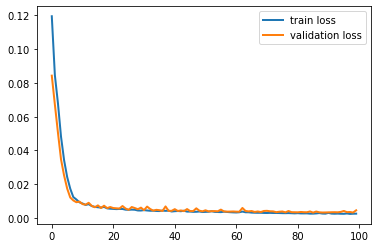

In [41]:
# Design the network 
encoder_decoder=Sequential()
encoder_decoder.add(LSTM(64,input_shape=(train_X.shape[1],train_X.shape[2])))
encoder_decoder.add(RepeatVector(train_X.shape[1]))
encoder_decoder.add(LSTM(128,return_sequences=True))
encoder_decoder.add(TimeDistributed(Dense(64, activation='relu')))
encoder_decoder.add(LSTM(128))
encoder_decoder.add(Dense(n_hours_future))
keras.backend.clear_session()
encoder_decoder.compile(loss='mse', optimizer=Adam(learning_rate=lr))


# Fit the network
history = encoder_decoder.fit(train_X, train_y, 
                              validation_data=(test_X, test_y), 
                              batch_size=batch, 
                              epochs=epochs_size, 
                              verbose=2)


# Plot the history
plt.plot(history.history['loss'], linewidth = 2)
plt.plot(history.history['val_loss'], linewidth = 2)
plt.grid(False)
a =  plt.legend(['train loss','validation loss'])

plt.show()

In [42]:
# Summary model 
encoder_decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                18176     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 25, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 128)           98816     
_________________________________________________________________
time_distributed (TimeDistri (None, 25, 64)            8256      
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 224,193
Trainable params: 224,193
Non-trainable params: 0
__________________________________________________

In [43]:
# Perform predictions
yhat1 = encoder_decoder.predict(test_X)

In [44]:
# Reshape values
test_X_reshaped = test_X.reshape((test_X.shape[0], n_hours_past*n_features))

for i in range(0, n_hours_future):
    yhat_i1 = yhat1[:,i]
    yhat_i1 = yhat_i1.reshape((yhat_i1.shape[0],1))
    
    test_y_i = test_y[:,i]
    test_y_i = test_y_i.reshape((test_y_i.shape[0],1))
    
    # Invert normalization of forecast values

    inv_yhat_i1 = concatenate((yhat_i1, test_X_reshaped[:, -5:]), axis=1) #######malmi office
    inv_yhat_i1 = scaler.inverse_transform(inv_yhat_i1)
    inv_yhat_i1 = inv_yhat_i1[:,0]

    # Invert normalization of actual values

    inv_y_i1 = concatenate((test_y_i, test_X_reshaped[:, -5:]), axis=1)  #######malmi office
    inv_y_i1 = scaler.inverse_transform(inv_y_i1)
    inv_y_i1 = inv_y_i1[:,0]
    
    # Calculate RMSE & STD
    rmse_i = sqrt(mean_squared_error(inv_y_i1, inv_yhat_i1))
    std_i = np.std(np.absolute(inv_y_i1 - inv_yhat_i1))
    print('Test RMSE and STD %d hour ahead: %.3f, %.3f' % (i+1,rmse_i,std_i))

Test RMSE and STD 1 hour ahead: 3.664, 2.329


# 6. Visualization and Evaluation of Obtained Results 

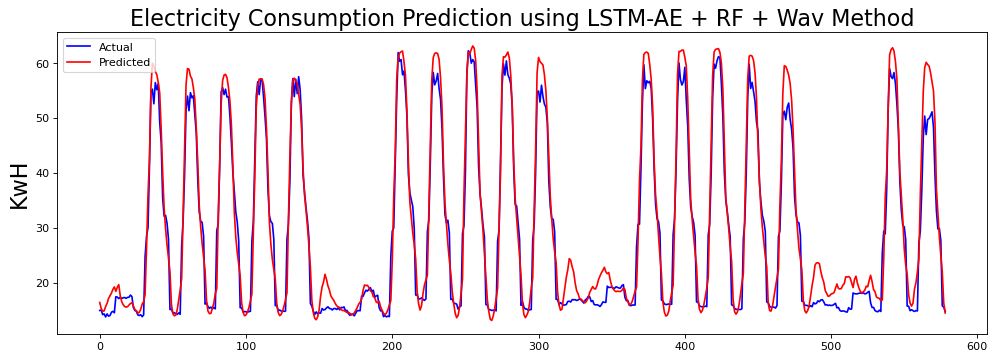

In [45]:
# Plot the actual versus prediction values
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 
line1, = plt.plot(inv_y_i1,color = 'b',label='Actual')
line2,=  plt.plot(inv_yhat_i1,'red',label='Predicted')
plt.title('Electricity Consumption Prediction using LSTM-AE + RF + Wav Method', fontsize=20)
plt.ylabel('KwH', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

In [46]:
testAE=inv_y_i1
predAE=inv_yhat_i1

In [47]:
# Perform normalization operations 
testAE1 = testAE.reshape(-1, 1)
predAE1 = predAE.reshape(-1, 1)
# Perform normalization operations 
scalerAE = MinMaxScaler(feature_range=(0,1))
testAE1 = scalerAE.fit_transform(testAE1)
predAE1 = scalerAE.fit_transform(predAE1)

In [48]:
# Precision results using evaluation metric
MSEAE=mean_squared_error(testAE1, predAE1, squared = False)
print('MSE:  ', MSEAE)

POCIDAE=pocid(testAE, predAE)
print('POCID (Precision %):  ', POCIDAE)

MSE:   0.073622204
POCID (Precision %):   71.10726643598616
